In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk

In [2]:
#loading the dataset
df = pd.read_csv('IndianWeatherRepository.csv')
df

,country,location_name,region,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,...,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
0,India,Ashoknagar,Madhya Pradesh,24.57,77.72,Asia/Kolkata,1693286100,2023-08-29 10:45,27.5,81.5,...,12.6,18.5,1,2,05:59 AM,06:41 PM,05:42 PM,03:38 AM,Waxing Gibbous,93
1,India,Raisen,Madhya Pradesh,23.33,77.80,Asia/Kolkata,1693286100,2023-08-29 10:45,27.5,81.5,...,10.7,14.2,1,1,06:00 AM,06:40 PM,05:39 PM,03:41 AM,Waxing Gibbous,93
2,India,Chhindwara,Madhya Pradesh,22.07,78.93,Asia/Kolkata,1693286100,2023-08-29 10:45,26.3,79.3,...,16.8,20.7,2,2,05:56 AM,06:34 PM,05:32 PM,03:39 AM,Waxing Gibbous,93
3,India,Betul,Madhya Pradesh,21.86,77.93,Asia/Kolkata,1693286100,2023-08-29 10:45,25.6,78.1,...,4.9,6.6,1,1,06:00 AM,06:38 PM,05:36 PM,03:43 AM,Waxing Gibbous,93
4,India,Hoshangabad,Madhya Pradesh,22.75,77.72,Asia/Kolkata,1693286100,2023-08-29 10:45,27.2,81.0,...,11.4,14.8,1,1,06:01 AM,06:39 PM,05:38 PM,03:42 AM,Waxing Gibbous,93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53067,India,Niwari,Uttar Pradesh,28.88,77.53,Asia/Kolkata,1701978300,2023-12-08 01:15,15.0,59.0,...,343.3,435.1,6,10,07:00 AM,05:23 PM,01:26 AM,01:43 PM,Waning Crescent,34
53068,India,Saitual,Mizoram,23.97,92.58,Asia/Kolkata,1701978300,2023-12-08 01:15,19.9,67.8,...,12.5,13.3,1,2,05:50 AM,04:32 PM,12:24 AM,12:42 PM,Waning Crescent,34
53069,India,Ranipet,Tamil Nadu,12.93,79.33,Asia/Kolkata,1701978300,2023-12-08 01:15,23.7,74.7,...,65.7,71.4,4,9,06:22 AM,05:46 PM,01:20 AM,01:38 PM,Waning Crescent,34
53070,India,Tenkasi,Tamil Nadu,8.97,77.30,Asia/Kolkata,1701978300,2023-12-08 01:15,22.8,73.1,...,11.4,13.8,1,1,06:23 AM,06:01 PM,01:29 AM,01:47 PM,Waning Crescent,34


In [3]:
#remove redundant attributes
col_to_remove=['country','latitude','longitude','timezone','last_updated_epoch','temperature_celsius','wind_mph','wind_direction','pressure_in','precip_in','feels_like_celsius','visibility_miles','gust_mph','sunrise','sunset','moonrise','moonset','moon_phase','moon_illumination']
df = df.drop(columns=col_to_remove)
df

,location_name,region,last_updated,temperature_fahrenheit,condition_text,wind_kph,wind_degree,pressure_mb,precip_mm,humidity,...,uv_index,gust_kph,air_quality_Carbon_Monoxide,air_quality_Ozone,air_quality_Nitrogen_dioxide,air_quality_Sulphur_dioxide,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index
0,Ashoknagar,Madhya Pradesh,2023-08-29 10:45,81.5,Partly cloudy,20.5,281,1008.0,0.00,67,...,7.0,23.8,243.7,45.8,1.7,3.1,12.6,18.5,1,2
1,Raisen,Madhya Pradesh,2023-08-29 10:45,81.5,Sunny,15.5,287,1008.0,0.00,70,...,7.0,18.0,240.3,38.3,2.1,2.6,10.7,14.2,1,1
2,Chhindwara,Madhya Pradesh,2023-08-29 10:45,79.3,Partly cloudy,18.4,317,1009.0,0.00,70,...,7.0,21.2,220.3,57.2,0.6,1.7,16.8,20.7,2,2
3,Betul,Madhya Pradesh,2023-08-29 10:45,78.1,Cloudy,16.9,297,1009.0,0.00,76,...,6.0,20.9,200.3,25.0,1.2,1.1,4.9,6.6,1,1
4,Hoshangabad,Madhya Pradesh,2023-08-29 10:45,81.0,Cloudy,16.2,274,1009.0,0.00,74,...,6.0,18.7,257.0,30.8,2.2,1.8,11.4,14.8,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53067,Niwari,Uttar Pradesh,2023-12-08 01:15,59.0,Mist,3.6,10,1016.0,0.00,82,...,1.0,14.4,2883.9,0.1,55.5,8.2,343.3,435.1,6,10
53068,Saitual,Mizoram,2023-12-08 01:15,67.8,Patchy rain possible,3.6,82,1013.0,0.06,100,...,1.0,10.8,283.7,0.5,3.0,0.4,12.5,13.3,1,2
53069,Ranipet,Tamil Nadu,2023-12-08 01:15,74.7,Partly cloudy,4.0,71,1011.0,0.00,93,...,1.0,6.6,694.3,25.0,11.1,1.6,65.7,71.4,4,9
53070,Tenkasi,Tamil Nadu,2023-12-08 01:15,73.1,Partly cloudy,6.5,282,1011.0,0.00,92,...,1.0,11.4,433.9,35.8,4.8,1.3,11.4,13.8,1,1


region
Andaman and Nicobar Islands     1
Andhra Pradesh                 32
Arunachal Pradesh               2
Assam                          21
Bihar                          29
Chandigarh                      1
Chhattisgarh                   22
Dadra and Nagar Haveli          1
Daman and Diu                   2
Delhi                           2
Goa                             2
Gujarat                        23
Haryana                        20
Himachal Pradesh                5
Jammu and Kashmir              20
Jharkhand                      18
Karnataka                      23
Kerala                         14
Lakshadweep                     1
Madhya Pradesh                 48
Maharashtra                    32
Manipur                         8
Mizoram                         7
Nagaland                        6
Orissa                         25
Puducherry                      2
Punjab                         19
Rajasthan                      36
Tamil Nadu                     28
Tripura

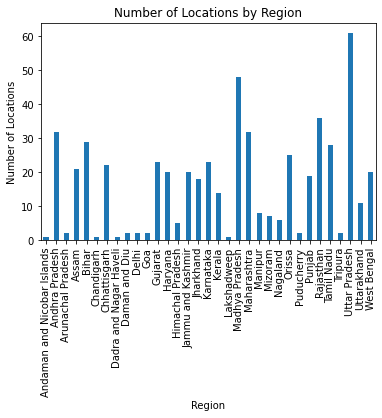

Udaipur          190
East Godavari    164
Siang            158
Barddhaman       139
Kolkata          137
                ... 
Ghaziabad         96
Narsimhapur       96
Seoni             96
Palghar           96
Mancherial        96
Name: location_name, Length: 543, dtype: int64


In [4]:
#location names per state/ UT
count=df.groupby('region')['location_name'].nunique()
print(count)
count.plot(kind='bar')
plt.title('Number of Locations by Region')
plt.xlabel('Region')
plt.ylabel('Number of Locations')
plt.show()
#conclusion: UP has the most no. of regions
#andaman has the readings for only one region

#frequency of each location
frequency = df['location_name'].value_counts()
print(frequency)

In [5]:
#extract the rows whose region name is Andaman and Nicobar Islands
condition=df['region']=='Andaman and Nicobar Islands'
df = df[condition]
df

,location_name,region,last_updated,temperature_fahrenheit,condition_text,wind_kph,wind_degree,pressure_mb,precip_mm,humidity,...,uv_index,gust_kph,air_quality_Carbon_Monoxide,air_quality_Ozone,air_quality_Nitrogen_dioxide,air_quality_Sulphur_dioxide,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index
187,Arong,Andaman and Nicobar Islands,2023-08-29 10:45,82.0,Light rain shower,36.7,259,1009.0,0.30,80,...,6.0,50.8,233.7,22.9,0.4,0.4,3.4,6.0,1,1
730,Arong,Andaman and Nicobar Islands,2023-08-30 08:45,81.1,Light rain shower,22.0,269,1010.0,1.60,79,...,6.0,31.3,217.0,26.8,0.4,0.3,2.8,5.8,1,1
1280,Arong,Andaman and Nicobar Islands,2023-08-31 05:15,82.2,Cloudy,31.7,242,1009.0,0.00,83,...,6.0,43.9,196.9,31.5,0.3,0.2,2.2,4.7,1,1
1830,Arong,Andaman and Nicobar Islands,2023-09-01 05:15,81.7,Moderate or heavy rain shower,40.0,243,1010.0,3.90,82,...,6.0,69.5,208.6,27.5,0.3,0.2,2.3,5.9,1,1
2374,Arong,Andaman and Nicobar Islands,2023-09-02 05:15,80.6,Moderate or heavy rain shower,33.1,237,1009.0,3.30,83,...,6.0,52.6,201.9,27.2,0.4,0.3,2.2,5.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50517,Arong,Andaman and Nicobar Islands,2023-12-04 02:00,81.0,Patchy rain possible,18.7,85,1008.0,0.21,81,...,1.0,26.3,403.9,63.7,0.4,0.2,7.0,8.3,1,1
51066,Arong,Andaman and Nicobar Islands,2023-12-05 01:00,80.4,Patchy rain possible,7.6,129,1008.0,1.16,81,...,1.0,10.9,287.1,37.2,0.8,0.2,1.6,2.1,1,1
51612,Arong,Andaman and Nicobar Islands,2023-12-06 01:15,80.6,Partly cloudy,12.6,134,1009.0,0.00,84,...,1.0,17.3,243.7,36.8,0.4,0.2,1.2,2.0,1,1
52159,Arong,Andaman and Nicobar Islands,2023-12-07 01:15,80.3,Light rain shower,8.6,160,1010.0,0.97,80,...,1.0,13.1,297.1,32.9,0.6,0.2,0.7,1.6,1,1


Andaman has only 70 rows

WEATHER TYPES IN ANDAMAN:

In [6]:
#different weather names used
distinct_values = df['condition_text'].unique().tolist()
print(distinct_values)
print("There are "+str(len(distinct_values))+" distinct weather types in the dataset")

['Light rain shower', 'Cloudy', 'Moderate or heavy rain shower', 'Torrential rain shower', 'Thundery outbreaks possible', 'Partly cloudy', 'Patchy rain possible', 'Clear', 'Light drizzle', 'Patchy light drizzle', 'Patchy light rain', 'Heavy rain']
There are 12 distinct weather types in the dataset


MISSING VALUES

In [7]:
#percentage of missing values
missing_values=df.isnull()
miss_percent=(missing_values.sum()/len(df))*100
missing_data=pd.DataFrame({'missing percent': miss_percent})
print(missing_data)

                              missing percent
location_name                             0.0
region                                    0.0
last_updated                              0.0
temperature_fahrenheit                    0.0
condition_text                            0.0
wind_kph                                  0.0
wind_degree                               0.0
pressure_mb                               0.0
precip_mm                                 0.0
humidity                                  0.0
cloud                                     0.0
feels_like_fahrenheit                     0.0
visibility_km                             0.0
uv_index                                  0.0
gust_kph                                  0.0
air_quality_Carbon_Monoxide               0.0
air_quality_Ozone                         0.0
air_quality_Nitrogen_dioxide              0.0
air_quality_Sulphur_dioxide               0.0
air_quality_PM2.5                         0.0
air_quality_PM10                  

REMOVE DUPLICATES

In [8]:
#identify and remove duplicated rows
duplicated_rows=df.duplicated(keep=False)
print(duplicated_rows)
duplicate_data=df[duplicated_rows]
print(duplicate_data)
df=df.drop_duplicates(keep='first')
print('number of rows: ',df.shape[0])

187      False
730      False
1280     False
1830     False
2374     False
         ...  
50517    False
51066    False
51612    False
52159    False
52709    False
Length: 97, dtype: bool
Empty DataFrame
Columns: [location_name, region, last_updated, temperature_fahrenheit, condition_text, wind_kph, wind_degree, pressure_mb, precip_mm, humidity, cloud, feels_like_fahrenheit, visibility_km, uv_index, gust_kph, air_quality_Carbon_Monoxide, air_quality_Ozone, air_quality_Nitrogen_dioxide, air_quality_Sulphur_dioxide, air_quality_PM2.5, air_quality_PM10, air_quality_us-epa-index, air_quality_gb-defra-index]
Index: []

[0 rows x 23 columns]
number of rows:  97


DATA TYPE OF EACH ROW

In [9]:
#data type of each row
data_types = df.dtypes
print(data_types)

location_name                    object
region                           object
last_updated                     object
temperature_fahrenheit          float64
condition_text                   object
wind_kph                        float64
wind_degree                       int64
pressure_mb                     float64
precip_mm                       float64
humidity                          int64
cloud                             int64
feels_like_fahrenheit           float64
visibility_km                   float64
uv_index                        float64
gust_kph                        float64
air_quality_Carbon_Monoxide     float64
air_quality_Ozone               float64
air_quality_Nitrogen_dioxide    float64
air_quality_Sulphur_dioxide     float64
air_quality_PM2.5               float64
air_quality_PM10                float64
air_quality_us-epa-index          int64
air_quality_gb-defra-index        int64
dtype: object


REMOVE TIME STAMP FROM DATE

In [10]:
my_column = df['last_updated']
modified_column = my_column.apply(lambda x: x[:-5])
df['last_updated'] = modified_column
df


,location_name,region,last_updated,temperature_fahrenheit,condition_text,wind_kph,wind_degree,pressure_mb,precip_mm,humidity,...,uv_index,gust_kph,air_quality_Carbon_Monoxide,air_quality_Ozone,air_quality_Nitrogen_dioxide,air_quality_Sulphur_dioxide,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index
187,Arong,Andaman and Nicobar Islands,2023-08-29,82.0,Light rain shower,36.7,259,1009.0,0.30,80,...,6.0,50.8,233.7,22.9,0.4,0.4,3.4,6.0,1,1
730,Arong,Andaman and Nicobar Islands,2023-08-30,81.1,Light rain shower,22.0,269,1010.0,1.60,79,...,6.0,31.3,217.0,26.8,0.4,0.3,2.8,5.8,1,1
1280,Arong,Andaman and Nicobar Islands,2023-08-31,82.2,Cloudy,31.7,242,1009.0,0.00,83,...,6.0,43.9,196.9,31.5,0.3,0.2,2.2,4.7,1,1
1830,Arong,Andaman and Nicobar Islands,2023-09-01,81.7,Moderate or heavy rain shower,40.0,243,1010.0,3.90,82,...,6.0,69.5,208.6,27.5,0.3,0.2,2.3,5.9,1,1
2374,Arong,Andaman and Nicobar Islands,2023-09-02,80.6,Moderate or heavy rain shower,33.1,237,1009.0,3.30,83,...,6.0,52.6,201.9,27.2,0.4,0.3,2.2,5.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50517,Arong,Andaman and Nicobar Islands,2023-12-04,81.0,Patchy rain possible,18.7,85,1008.0,0.21,81,...,1.0,26.3,403.9,63.7,0.4,0.2,7.0,8.3,1,1
51066,Arong,Andaman and Nicobar Islands,2023-12-05,80.4,Patchy rain possible,7.6,129,1008.0,1.16,81,...,1.0,10.9,287.1,37.2,0.8,0.2,1.6,2.1,1,1
51612,Arong,Andaman and Nicobar Islands,2023-12-06,80.6,Partly cloudy,12.6,134,1009.0,0.00,84,...,1.0,17.3,243.7,36.8,0.4,0.2,1.2,2.0,1,1
52159,Arong,Andaman and Nicobar Islands,2023-12-07,80.3,Light rain shower,8.6,160,1010.0,0.97,80,...,1.0,13.1,297.1,32.9,0.6,0.2,0.7,1.6,1,1


In [11]:
columns_to_delete = ['location_name','air_quality_Carbon_Monoxide', 'air_quality_Ozone','air_quality_Nitrogen_dioxide','air_quality_Sulphur_dioxide','air_quality_PM2.5','air_quality_PM10','air_quality_us-epa-index','air_quality_gb-defra-index']
df = df.drop(columns=columns_to_delete)
df

,region,last_updated,temperature_fahrenheit,condition_text,wind_kph,wind_degree,pressure_mb,precip_mm,humidity,cloud,feels_like_fahrenheit,visibility_km,uv_index,gust_kph
187,Andaman and Nicobar Islands,2023-08-29,82.0,Light rain shower,36.7,259,1009.0,0.30,80,70,89.2,10.0,6.0,50.8
730,Andaman and Nicobar Islands,2023-08-30,81.1,Light rain shower,22.0,269,1010.0,1.60,79,75,87.4,10.0,6.0,31.3
1280,Andaman and Nicobar Islands,2023-08-31,82.2,Cloudy,31.7,242,1009.0,0.00,83,69,90.3,10.0,6.0,43.9
1830,Andaman and Nicobar Islands,2023-09-01,81.7,Moderate or heavy rain shower,40.0,243,1010.0,3.90,82,83,89.2,7.0,6.0,69.5
2374,Andaman and Nicobar Islands,2023-09-02,80.6,Moderate or heavy rain shower,33.1,237,1009.0,3.30,83,90,87.1,7.0,6.0,52.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50517,Andaman and Nicobar Islands,2023-12-04,81.0,Patchy rain possible,18.7,85,1008.0,0.21,81,70,87.7,9.0,1.0,26.3
51066,Andaman and Nicobar Islands,2023-12-05,80.4,Patchy rain possible,7.6,129,1008.0,1.16,81,81,86.5,9.0,1.0,10.9
51612,Andaman and Nicobar Islands,2023-12-06,80.6,Partly cloudy,12.6,134,1009.0,0.00,84,28,87.4,10.0,1.0,17.3
52159,Andaman and Nicobar Islands,2023-12-07,80.3,Light rain shower,8.6,160,1010.0,0.97,80,83,86.0,10.0,1.0,13.1


convertng all int 64 datatypes to float 64

In [12]:
#convert the int64 data to float64
df['humidity'] = df['humidity'].astype('float64')
df['wind_degree'] = df['wind_degree'].astype('float64')
df['cloud'] = df['cloud'].astype('float64')

data_types = df.dtypes
print(data_types)

region                     object
last_updated               object
temperature_fahrenheit    float64
condition_text             object
wind_kph                  float64
wind_degree               float64
pressure_mb               float64
precip_mm                 float64
humidity                  float64
cloud                     float64
feels_like_fahrenheit     float64
visibility_km             float64
uv_index                  float64
gust_kph                  float64
dtype: object


encoding condition text for logistic regression

In [13]:

from sklearn.preprocessing import LabelEncoder

# Create an instance of LabelEncoder
encoder = LabelEncoder()

# Fit the encoder on the column and transform the values
df['condition_text'] = encoder.fit_transform(df['condition_text'])
df['condition_text'] = df['condition_text'].astype(int)

# Access the encoded classes
encoded_classes = encoder.classes_
print("Encoded Classes:", encoded_classes)

# Decode the encoded values to get the original labels
decoded_labels = encoder.inverse_transform(df['condition_text'])
print("Decoded Labels:", decoded_labels)

Encoded Classes: ['Clear' 'Cloudy' 'Heavy rain' 'Light drizzle' 'Light rain shower'
 'Moderate or heavy rain shower' 'Partly cloudy' 'Patchy light drizzle'
 'Patchy light rain' 'Patchy rain possible' 'Thundery outbreaks possible'
 'Torrential rain shower']
Decoded Labels: ['Light rain shower' 'Light rain shower' 'Cloudy'
 'Moderate or heavy rain shower' 'Moderate or heavy rain shower'
 'Torrential rain shower' 'Thundery outbreaks possible' 'Cloudy'
 'Partly cloudy' 'Thundery outbreaks possible' 'Cloudy' 'Cloudy'
 'Light rain shower' 'Light rain shower' 'Thundery outbreaks possible'
 'Partly cloudy' 'Partly cloudy' 'Light rain shower' 'Light rain shower'
 'Patchy rain possible' 'Cloudy' 'Patchy rain possible' 'Clear'
 'Patchy rain possible' 'Patchy rain possible' 'Patchy rain possible'
 'Partly cloudy' 'Light rain shower' 'Light rain shower'
 'Light rain shower' 'Light drizzle' 'Light rain shower'
 'Patchy rain possible' 'Patchy rain possible' 'Cloudy'
 'Patchy rain possible' 'Light rai

inserting 7 days worth ofdata in one row

In [14]:
condition_text = df['condition_text']
df=df.assign(condition_text1= df['condition_text'].shift(-1))
df=df.assign(condition_text2= df['condition_text'].shift(-2))
df=df.assign(condition_text3= df['condition_text'].shift(-3))
df=df.assign(condition_text4= df['condition_text'].shift(-4))
df=df.assign(condition_text5= df['condition_text'].shift(-5))
df=df.assign(condition_text6= df['condition_text'].shift(-6))
df=df.assign(condition_text7= df['condition_text'].shift(-7))

condition_text = df['last_updated']
df=df.assign(last_updated1= df['last_updated'].shift(-1))
df=df.assign(last_updated2= df['last_updated'].shift(-2))
df=df.assign(last_updated3= df['last_updated'].shift(-3))
df=df.assign(last_updated4= df['last_updated'].shift(-4))
df=df.assign(last_updated5= df['last_updated'].shift(-5))
df=df.assign(last_updated6= df['last_updated'].shift(-6))
df=df.assign(last_updated7= df['last_updated'].shift(-7))

condition_text = df['temperature_fahrenheit']
df=df.assign(temperature_fahrenheit1= df['temperature_fahrenheit'].shift(-1))
df=df.assign(temperature_fahrenheit2= df['temperature_fahrenheit'].shift(-2))
df=df.assign(temperature_fahrenheit3= df['temperature_fahrenheit'].shift(-3))
df=df.assign(temperature_fahrenheit4= df['temperature_fahrenheit'].shift(-4))
df=df.assign(temperature_fahrenheit5= df['temperature_fahrenheit'].shift(-5))
df=df.assign(temperature_fahrenheit6= df['temperature_fahrenheit'].shift(-6))
df=df.assign(temperature_fahrenheit7= df['temperature_fahrenheit'].shift(-7))

condition_text = df['wind_kph']
df=df.assign(wind_kph1= df['wind_kph'].shift(-1))
df=df.assign(wind_kph2= df['wind_kph'].shift(-2))
df=df.assign(wind_kph3= df['wind_kph'].shift(-3))
df=df.assign(wind_kph4= df['wind_kph'].shift(-4))
df=df.assign(wind_kph5= df['wind_kph'].shift(-5))
df=df.assign(wind_kph6= df['wind_kph'].shift(-6))
df=df.assign(wind_kph7= df['wind_kph'].shift(-7))

condition_text = df['wind_degree']
df=df.assign(wind_degree1= df['wind_degree'].shift(-1))
df=df.assign(wind_degree2= df['wind_degree'].shift(-2))
df=df.assign(wind_degree3= df['wind_degree'].shift(-3))
df=df.assign(wind_degree4= df['wind_degree'].shift(-4))
df=df.assign(wind_degree5= df['wind_degree'].shift(-5))
df=df.assign(wind_degree6= df['wind_degree'].shift(-6))
df=df.assign(wind_degree7= df['wind_degree'].shift(-7))

condition_text = df['pressure_mb']
df=df.assign(pressure_mb1= df['pressure_mb'].shift(-1))
df=df.assign(pressure_mb2= df['pressure_mb'].shift(-2))
df=df.assign(pressure_mb3= df['pressure_mb'].shift(-3))
df=df.assign(pressure_mb4= df['pressure_mb'].shift(-4))
df=df.assign(pressure_mb5= df['pressure_mb'].shift(-5))
df=df.assign(pressure_mb6= df['pressure_mb'].shift(-6))
df=df.assign(pressure_mb7= df['pressure_mb'].shift(-7))

condition_text = df['precip_mm']
df=df.assign(precip_mm1= df['precip_mm'].shift(-1))
df=df.assign(precip_mm2= df['precip_mm'].shift(-2))
df=df.assign(precip_mm3= df['precip_mm'].shift(-3))
df=df.assign(precip_mm4= df['precip_mm'].shift(-4))
df=df.assign(precip_mm5= df['precip_mm'].shift(-5))
df=df.assign(precip_mm6= df['precip_mm'].shift(-6))
df=df.assign(precip_mm7= df['precip_mm'].shift(-7))

condition_text = df['humidity']
df=df.assign(humidity1= df['humidity'].shift(-1))
df=df.assign(humidity2= df['humidity'].shift(-2))
df=df.assign(humidity3= df['humidity'].shift(-3))
df=df.assign(humidity4= df['humidity'].shift(-4))
df=df.assign(humidity5= df['humidity'].shift(-5))
df=df.assign(humidity6= df['humidity'].shift(-6))
df=df.assign(humidity7= df['humidity'].shift(-7))

condition_text = df['cloud']
df=df.assign(cloud1= df['cloud'].shift(-1))
df=df.assign(cloud2= df['cloud'].shift(-2))
df=df.assign(cloud3= df['cloud'].shift(-3))
df=df.assign(cloud4= df['cloud'].shift(-4))
df=df.assign(cloud5= df['cloud'].shift(-5))
df=df.assign(cloud6= df['cloud'].shift(-6))
df=df.assign(cloud7= df['cloud'].shift(-7))

condition_text = df['visibility_km']
df=df.assign(visibility_km1= df['visibility_km'].shift(-1))
df=df.assign(visibility_km2= df['visibility_km'].shift(-2))
df=df.assign(visibility_km3= df['visibility_km'].shift(-3))
df=df.assign(visibility_km4= df['visibility_km'].shift(-4))
df=df.assign(visibility_km5= df['visibility_km'].shift(-5))
df=df.assign(visibility_km6= df['visibility_km'].shift(-6))
df=df.assign(visibility_km7= df['visibility_km'].shift(-7))


data= df[['region','last_updated','temperature_fahrenheit','wind_kph','wind_degree','pressure_mb','precip_mm','humidity','cloud','visibility_km','condition_text','last_updated1','temperature_fahrenheit1','wind_kph1','wind_degree1','pressure_mb1','precip_mm1','humidity1','cloud1','visibility_km1','condition_text1','last_updated2','temperature_fahrenheit2','wind_kph2','wind_degree2','pressure_mb2','precip_mm2','humidity2','cloud2','visibility_km2','condition_text2','last_updated3','temperature_fahrenheit3','wind_kph3','wind_degree3','pressure_mb3','precip_mm3','humidity3','cloud3','visibility_km3','condition_text3','last_updated4','temperature_fahrenheit4','wind_kph4','wind_degree4','pressure_mb4','precip_mm4','humidity4','cloud4','visibility_km4','condition_text4','last_updated5','temperature_fahrenheit5','wind_kph5','wind_degree5','pressure_mb5','precip_mm5','humidity5','cloud5','visibility_km5','condition_text5','last_updated6','temperature_fahrenheit6','wind_kph6','wind_degree6','pressure_mb6','precip_mm6','humidity6','cloud6','visibility_km6','condition_text6','last_updated7','temperature_fahrenheit7','wind_kph7','wind_degree7','pressure_mb7','precip_mm7','humidity7','cloud7','visibility_km7','condition_text7']]
data=data.dropna()
data

,region,last_updated,temperature_fahrenheit,wind_kph,wind_degree,pressure_mb,precip_mm,humidity,cloud,visibility_km,...,last_updated7,temperature_fahrenheit7,wind_kph7,wind_degree7,pressure_mb7,precip_mm7,humidity7,cloud7,visibility_km7,condition_text7
187,Andaman and Nicobar Islands,2023-08-29,82.0,36.7,259.0,1009.0,0.30,80.0,70.0,10.0,...,2023-09-05,81.7,41.4,222.0,1007.0,0.00,81.0,84.0,10.0,1.0
730,Andaman and Nicobar Islands,2023-08-30,81.1,22.0,269.0,1010.0,1.60,79.0,75.0,10.0,...,2023-09-06,82.2,29.2,235.0,1008.0,0.00,84.0,53.0,10.0,6.0
1280,Andaman and Nicobar Islands,2023-08-31,82.2,31.7,242.0,1009.0,0.00,83.0,69.0,10.0,...,2023-09-07,82.0,18.0,213.0,1009.0,0.00,81.0,29.0,9.0,10.0
1830,Andaman and Nicobar Islands,2023-09-01,81.7,40.0,243.0,1010.0,3.90,82.0,83.0,7.0,...,2023-09-08,81.9,16.6,235.0,1009.0,0.00,80.0,83.0,10.0,1.0
2374,Andaman and Nicobar Islands,2023-09-02,80.6,33.1,237.0,1009.0,3.30,83.0,90.0,7.0,...,2023-09-09,81.5,23.0,230.0,1009.0,0.00,82.0,73.0,10.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46690,Andaman and Nicobar Islands,2023-11-26,82.7,24.5,66.0,1009.0,0.01,76.0,68.0,9.0,...,2023-12-04,81.0,18.7,85.0,1008.0,0.21,81.0,70.0,9.0,9.0
47240,Andaman and Nicobar Islands,2023-11-27,80.8,20.9,110.0,1009.0,0.48,81.0,76.0,10.0,...,2023-12-05,80.4,7.6,129.0,1008.0,1.16,81.0,81.0,9.0,9.0
47784,Andaman and Nicobar Islands,2023-11-28,80.2,17.6,78.0,1008.0,0.74,83.0,59.0,10.0,...,2023-12-06,80.6,12.6,134.0,1009.0,0.00,84.0,28.0,10.0,6.0
48329,Andaman and Nicobar Islands,2023-11-29,81.0,26.6,87.0,1008.0,1.96,81.0,85.0,10.0,...,2023-12-07,80.3,8.6,160.0,1010.0,0.97,80.0,83.0,10.0,4.0


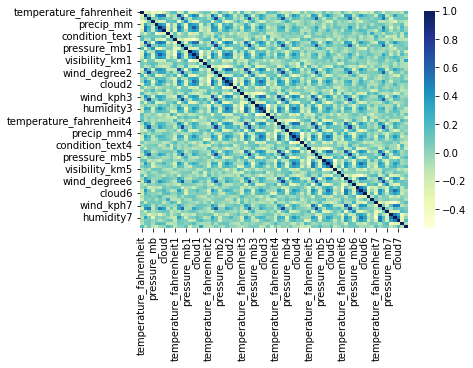

In [15]:
#since the accuracy has seen a significant increase we are going to stick with the current independent variables but due to the warning we might need to check for multicollinearity
corr_matrix=data.corr()
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(corr_matrix, cmap="YlGnBu")
plt.show()
#cloud is strongly related to humidity 

since the condition text can be predicted with 92% accuracy using the rows preceding it we can predict the weather of the upcoming days using the same columns for next day and so on. So we will predict the temperature, pressure, wind speen for the next 7 days and then use that to predict the weather

first we will normalise all numerical values and see if it helps improve accuracy

In [16]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Select only the numerical columns
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Create an instance of MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler on the numerical columns and transform the values
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])
data


,region,last_updated,temperature_fahrenheit,wind_kph,wind_degree,pressure_mb,precip_mm,humidity,cloud,visibility_km,...,last_updated7,temperature_fahrenheit7,wind_kph7,wind_degree7,pressure_mb7,precip_mm7,humidity7,cloud7,visibility_km7,condition_text7
187,Andaman and Nicobar Islands,2023-08-29,0.350427,0.835859,0.736994,0.777778,0.033333,0.50,0.673913,1.000,...,2023-09-05,0.324786,0.954545,0.630058,0.555556,0.000000,0.500000,0.826087,1.000,0.1
730,Andaman and Nicobar Islands,2023-08-30,0.273504,0.464646,0.765896,0.888889,0.177778,0.45,0.728261,1.000,...,2023-09-06,0.367521,0.646465,0.667630,0.666667,0.000000,0.636364,0.489130,1.000,0.6
1280,Andaman and Nicobar Islands,2023-08-31,0.367521,0.709596,0.687861,0.777778,0.000000,0.65,0.663043,1.000,...,2023-09-07,0.350427,0.363636,0.604046,0.777778,0.000000,0.500000,0.228261,0.875,1.0
1830,Andaman and Nicobar Islands,2023-09-01,0.324786,0.919192,0.690751,0.888889,0.433333,0.60,0.815217,0.625,...,2023-09-08,0.341880,0.328283,0.667630,0.777778,0.000000,0.454545,0.815217,1.000,0.1
2374,Andaman and Nicobar Islands,2023-09-02,0.230769,0.744949,0.673410,0.777778,0.366667,0.65,0.891304,0.625,...,2023-09-09,0.307692,0.489899,0.653179,0.777778,0.000000,0.545455,0.706522,1.000,0.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46690,Andaman and Nicobar Islands,2023-11-26,0.410256,0.527778,0.179191,0.777778,0.001111,0.30,0.652174,0.875,...,2023-12-04,0.264957,0.381313,0.234104,0.666667,0.015707,0.500000,0.673913,0.875,0.9
47240,Andaman and Nicobar Islands,2023-11-27,0.247863,0.436869,0.306358,0.777778,0.053333,0.55,0.739130,1.000,...,2023-12-05,0.213675,0.101010,0.361272,0.666667,0.086761,0.500000,0.793478,0.875,0.9
47784,Andaman and Nicobar Islands,2023-11-28,0.196581,0.353535,0.213873,0.666667,0.082222,0.65,0.554348,1.000,...,2023-12-06,0.230769,0.227273,0.375723,0.777778,0.000000,0.636364,0.217391,1.000,0.6
48329,Andaman and Nicobar Islands,2023-11-29,0.264957,0.580808,0.239884,0.666667,0.217778,0.55,0.836957,1.000,...,2023-12-07,0.205128,0.126263,0.450867,0.888889,0.072550,0.454545,0.815217,1.000,0.4


lets see how the accuracy of condition_text changes with normalisation

In [17]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# Load the dataset
X = data.iloc[:, [2,3,4,5,6,7,8,9]].values
y = data.iloc[:, 10].values
accuracy=0
max_accuracy=0
rand_i=0
rand_j=0
for i in range(0,100):
    for j in range(0,100):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)
        clf = tree.DecisionTreeClassifier(random_state=j)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        if accuracy > max_accuracy:
            max_accuracy = accuracy
            rand_i = i
            rand_j = j
print("Accuracy:", max_accuracy*100,"%"," \nRandom state for splitting the training and data set: ",rand_i,"\nRandom state for decision tree classifier: ",rand_j)

Accuracy: 100.0 %  
Random state for splitting the training and data set:  1 
Random state for decision tree classifier:  18


In [20]:
# we are now going to approach the solution using DECISION TREE CLASSIFIER
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# Load the dataset
X = data.iloc[:, [2,3,4,5,6,7,8,9]].values
y = data.iloc[:, 10].values

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Create a decision tree classifier
clf = tree.DecisionTreeClassifier(random_state=18)

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy*100,"%")

Accuracy: 100.0 %


In [21]:
#prediction using user input
user_input = np.array([[80.6, 12.6, 134, 1009, 0, 84, 28, 10, ]])
#user_input_normalized = np.concatenate((scaler.transform(user_input[:, :8]), user_input[:, 8:]), axis=1)
prediction= clf.predict(user_input)
print("Prediction:", prediction)


Prediction: [1]


the model works. now we use today's temperature to predict tomorrow's temperature and so on for all the features and then use these predicted features to predict 7 day weather